In [1]:
import numpy as np
from scipy import *
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xppcall import xpprun
import networkx as nx
import conley_functions as cf
import subprocess
import nolds
import scipy.optimize

####Set up network weights
a = 16
b = 12
d = 4
e = -2
W = np.array([[a, 0, -b, 0], [0, a, 0, -b],
              [a, 0, -d, 0], [0, a, 0, -d]]) 
N = W.shape[0]
ps = [-1,-1,-4,-4]

In [2]:
#make file to simulate Wilson-Cowan network with XPP
ksdm=-7
time=500
dt=0.05
P = 1
expn = 21
gamma = 10
Weights = []
datass = []
initss = []

for expi in  np.linspace(-10, 10, num=expn):
    Wp = np.zeros((N,N))
    Wp[0,-1] = ksdm
    Wp[1,-2] = ksdm
    Wp[2,-3] = ksdm
    Wp[3,-4] = ksdm
    Wp[0,1] = expi
    Wp[1,0] = expi
    Wp[2,3] = expi
    Wp[3,2] = expi
    Ws = W + Wp
    
    Weights.append(Ws)
#     wcstring = cf.make_wc(Ws, ps, dt=dt, inits=np.random.rand(N))
#     with open('wc_p.ode', 'w') as f:
#         f.writelines(wcstring)

#     datas = np.zeros((P, int(.1/dt)*time*10+1, N))
#     data_length_list = []
#     for j in range(P):
#         inits = np.random.rand(N)
#         initss.append(inits)
#         inits_dict={}
#         for i,init in enumerate(inits[:]):
#             inits_dict['x'+str(i+1)]=init
#         npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
#         datas[j, :, :] = npa[:,1:].copy()
#         data_length_list.append(npa[:,1:].shape[0])
#     datass.append(datas)

In [3]:
# %matplotlib notebook
# colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
# time=500
# shift=int((int(.1/dt)*time*10+1)*.5)
# til=int((int(.1/dt)*time*10+1)*.05)
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')
# for j in range(0,expn):
#     for k in range(P):
# #         ax.plot(datass[j][k,shift:til,0], datass[j][k,shift:til,1], datass[j][k,shift:til,2], '.', label=r"$\lambda$="+str(j))#str(j)+':'+str(k))
#         ax.plot(datass[j][k,shift:,0], datass[j][k,shift:,1], datass[j][k,shift:,2], '.', label=r"$\lambda$="+str(j))#str(j)+':'+str(k))
#         plt.legend()
# plt.show()

In [4]:
# %matplotlib notebook
# plt.figure(figsize=(9,3))
# j=18
# # for j in range(31,32, 10):
# #     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
# shift=int(20*time*0.5)
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,1])
# # for i in range(10):
# #     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,i])
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,2])
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,3])

In [5]:
Ws=Weights[10]
time=10000
wcstring = cf.make_wc(Ws, ps, dt=0.01)
with open('wc_p.ode', 'w') as f:
    f.writelines(wcstring)
# grid=cf.make_grid(4, 0.25, 0.75, 0.25)
# grid=[[0,0,0,0]]
grid=cf.make_grid(4, 0.2, 0.8, 0.2)
# grid=cf.make_grid(4, 0.2, 0.8, 0.1)
# grid=cf.make_grid(4, 0.0, 0.1, 0.25)

# grid=cf.make_grid(4, 0., 1, 1.)
eps=0.005
shift = int((int(.1/dt)*time*10+1)*.5)
P = len(grid)
print("P:",P,Ws)
# datas = np.zeros((P, int(.5/dt)*time*10+1, N))
alldata = []
data_length_list = []
for j,gc in enumerate(grid):
    with open('wc_p.ode', 'w') as f:
        f.writelines(wcstring)
    inits_dict={}
    for i,init in enumerate(gc[:]):
        inits_dict['x'+str(i+1)]=init
    npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
#     datas[j, :, :] = npa[:,1:].copy()
#     data_length_list.append(npa[:,1:].shape[0])


    data = npa[shift:,1:]
    x = 0.2
    poincaresection = []
    for i,point in enumerate(data[1:]):
        if np.sign(data[i][0]-x) == -np.sign(data[i-1][0]-x) and np.abs(data[i][0]-data[i-1][0])<eps:
            poincaresection.append((data[i][1:]+data[i-1][1:])/2.)
    alldata.append(np.array(poincaresection).T)
    data_length_list.append(len(poincaresection))

P: 256 [[ 16.   0. -12.  -7.]
 [  0.  16.  -7. -12.]
 [ 16.  -7.  -4.   0.]
 [ -7.  16.   0.  -4.]]


In [ ]:
# %matplotlib notebook
# # time=1000
# colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
# shift=int((int(.1/dt)*time*10+1)*.5)
# til=int((int(.1/dt)*time*10+1)*.55)
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')
# for k in range(P):
# # i=0
# # for k in range(10*i,10*(i+1)):
# # for k in range(8,9):
# #     print(k,grid[k])
# #     ax.plot(datas[k,shift:til,0], datas[k,shift:til,1], datas[k,shift:til,2], ',', label=r"$\lambda$="+str(k))#str(j)+':'+str(k))
#     ax.plot(datas[k,shift:,0], datas[k,shift:,1], datas[k,shift:,2], ',', label=r"$\lambda$="+str(k))#str(j)+':'+str(k))
# #     plt.legend()
# ax.set_xlabel('$X$', fontsize=20)
# ax.set_ylabel('$Y$', fontsize=20)
# ax.set_zlabel('$Z$', fontsize=20)
# plt.show()

In [101]:
#Poincare Section
eps=0.005
shift = shift
alldata = []
data_length_list = []
for p in range(P):
    data = datas[p,shift:,:]
    x = 0.2
    poincaresection = []
    for i,point in enumerate(data[1:]):
        if np.sign(data[i][0]-x) == -np.sign(data[i-1][0]-x) and np.abs(data[i][0]-data[i-1][0])<eps:
            poincaresection.append((data[i][1:]+data[i-1][1:])/2.)
    alldata.append(np.array(poincaresection).T)
    data_length_list.append(len(poincaresection))

<IPython.core.display.Javascript object>


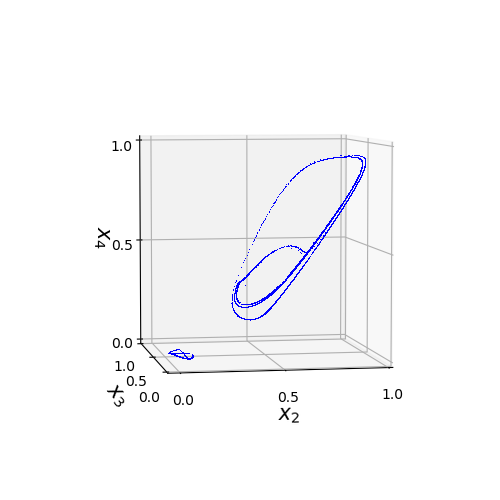

In [9]:
%matplotlib notebook
alldataT = []
colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for p in range(256):
    poincaresection = alldata[p]
    poincaresection = np.array(poincaresection)
    alldataT.append(poincaresection.T)
    try:
        ax.plot(poincaresection[0], poincaresection[1], poincaresection[2], 'b,')
    except:
        0
ax.set_xlabel('$x_2$', fontsize=15)
ax.set_ylabel('$x_3$', fontsize=15)
ax.set_zlabel('$x_4$', fontsize=15)
ax.set_xticks([0,1/2,1])
ax.set_yticks([0,1/2,1])
ax.set_zticks([0,1/2,1])
ax.set_xticklabels([0.,.5,1.])
ax.set_yticklabels([0.,.5,1.])
ax.set_zticklabels([0.,.5,1.])
ax.view_init(elev=5, azim=-100)
plt.savefig("Images/chaos3.png")
plt.show()

In [21]:
import pickle
outfile = open("poincaresection.txt",'wb')
pickle.dump(alldata, outfile)

In [6]:
import pickle
outfile = open("poincaresection.txt",'rb')
alldata = pickle.load(outfile)

In [81]:
# N0=poincaresection.T[np.where(poincaresection[-1]<0.2)].T
# N1=poincaresection.T[np.where(poincaresection[-1]>0.2)].T

In [83]:
# %matplotlib notebook
# colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(N0[0], N0[1], N0[2], ',')
# ax.plot(N1[0], N1[1], N1[2], ',')
# ax.set_xlabel('$Y$', fontsize=20)
# ax.set_ylabel('$Z$', fontsize=20)
# ax.set_zlabel('$W$', fontsize=20)
# plt.show()

In [10]:
alldataT[0].shape

(2156, 3)

In [20]:
#Make combinatorial dynamical system from the data
# shift=int(time*1.)
# hdatas = np.array(datas).reshape(-1,N)#npa[:shift,1:]
# hdatas = poincaresection.T
# data_length_list = [poincaresection.shape[1]]
hdatas = np.array(alldataT[0])
nbins = 2**7
delta = 1/nbins
print(delta)
cds = cf.Combinatorial_Dynamical_System(delta)
cds.get_cubesandgraph(hdatas, nbins, [alldataT[0].shape[0]], #minval=0, maxval=1.,
                      calc_matrix=False)
for p in range(1,256):
    try:
        data = alldataT[p]
#         print(data.shape)
    #     cds.update_cubesandgraph(alldataT[1], [data_length_list[1]])
        bins = np.linspace(0, 1, nbins)
        digitized = np.digitize(data, bins)
#         cds.G.add_nodes_from(bins)
        i=0
        bin1=digitized[0]
        bin2=digitized[1]
        cds.G.add_edge(tuple(bin1), tuple(bin2))
        s=-1
        for t,bin2 in enumerate(digitized[:-1]):
            s+=1
            if s % alldataT[p].shape[0] == 0:
                bin1=digitized[t+1]
                if s == data_length_list[p]:
                    i+=1
                    s=0
                continue
            if s % alldataT[p].shape[0] == 1:
                bin1=digitized[t]
                bin2=digitized[t+1]
                cds.G.add_edge(tuple(bin1), tuple(bin2))
                continue

            cds.G.add_edge(tuple(bin1), tuple(bin2))
            bin1 = bin2
    except:
        0

0.0078125


In [21]:
#Get the recurrent components (Morse sets)
RCs = cds.get_recurrent_components(includeselfedges=False)
len(RCs)

1

In [22]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for i in range(0,len(RCs)):
    ax.scatter((np.array(RCs[i])[:,0]-delta),(np.array(RCs[i])[:,1]-delta), (np.array(RCs[i])[:,2]-delta),s=10, marker='s', label=i+1)

# ax.scatter([x[0]*nbins], [x[1]*nbins], [x[2]*nbins],marker='s',s=10,c='red')
# (259, 259, 128, 128)
ax.set_xlabel('$x_2$', fontsize=15)
ax.set_ylabel('$x_3$', fontsize=15)
ax.set_zlabel('$x_4$', fontsize=15)
ax.set_xticks([0,nbins/2,nbins])
ax.set_yticks([0,nbins/2,nbins])
ax.set_zticks([0,nbins/2,nbins])
ax.set_xticklabels([0.,.5,1.])
ax.set_yticklabels([0.,.5,1.])
ax.set_zticklabels([0.,.5,1.])
ax.view_init(elev=5, azim=-100)
plt.savefig("Images/chaosbins.png")
plt.show()

<IPython.core.display.Javascript object>

In [14]:
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')
# for i in range(0,len(RCs)):
#     ax.scatter((np.array(RCs[i])[:,3]-delta),(np.array(RCs[i])[:,1]-delta), (np.array(RCs[i])[:,2]-delta),s=1, marker='s', label=i+1)

# # ax.scatter([x[3]*nbins], [x[1]*nbins], [x[2]*nbins],marker='s',s=10,c='red')
# # (259, 259, 128, 128)
# ax.set_xlabel('$x_1$', fontsize=15)
# ax.set_ylabel('$x_2$', fontsize=15)
# ax.set_zlabel('$x_3$', fontsize=15)
# ax.set_xticks([0,nbins/2,nbins])
# ax.set_yticks([0,nbins/2,nbins])
# ax.set_zticks([0,nbins/2,nbins])
# ax.set_xticklabels([0.,.5,1.])
# ax.set_yticklabels([0.,.5,1.])
# ax.set_zticklabels([0.,.5,1.])
# ax.view_init(elev=25., azim=-205)
# plt.savefig("Images/"type_(%s,%s)"%(ksdm,expi)")
# plt.show()

SyntaxError: invalid syntax (<ipython-input-14-c2f04833069c>, line 18)

In [15]:
# cds.G.remove_node((10,1, 15))
# cds.G.nodes()

<IPython.core.display.Javascript object>


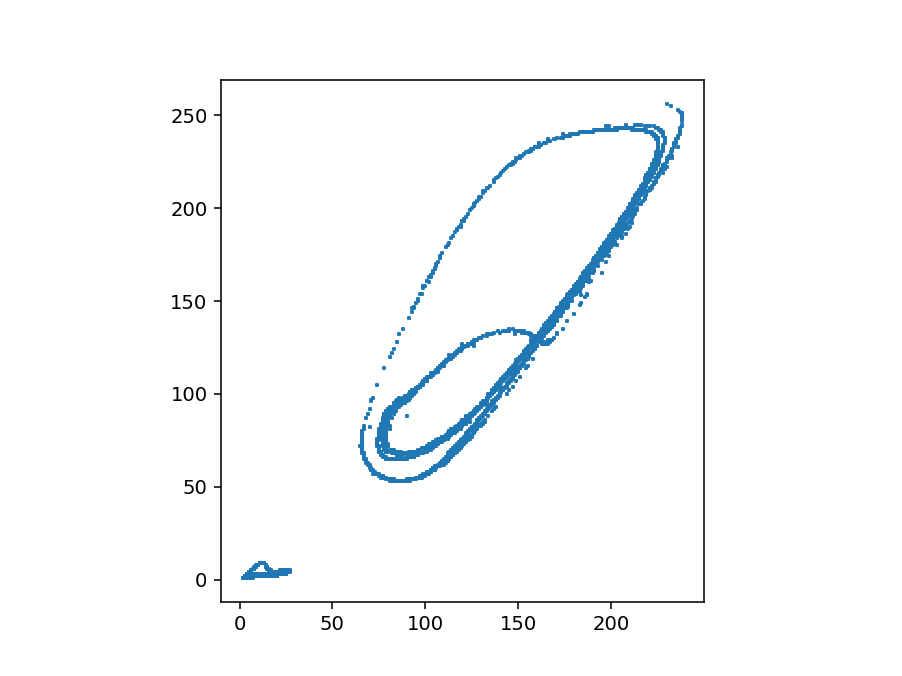

In [16]:
fig, ax = plt.subplots(dpi=141)
for i in range(len(RCs)):
    
    ax.set_aspect(1)
    fig.canvas.draw()
    s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
    plt.scatter((np.array(RCs[i])[:,0]-delta), (np.array(RCs[i])[:,2]-delta), s=s, marker='s', label=i+1)
# plt.legend()
plt.show()

In [17]:
N0 = set()#[]
N1 = set()#[]
for g in cds.G.nodes:
#     print(g)
    if g[2]<10:
#         N0.append(g)
        N0.add(g)
    else:
#         N1.append(g)
        N1.add(g)

In [18]:
N0arr = np.array(list(N0))
N1arr = np.array(list(N1))

<IPython.core.display.Javascript object>


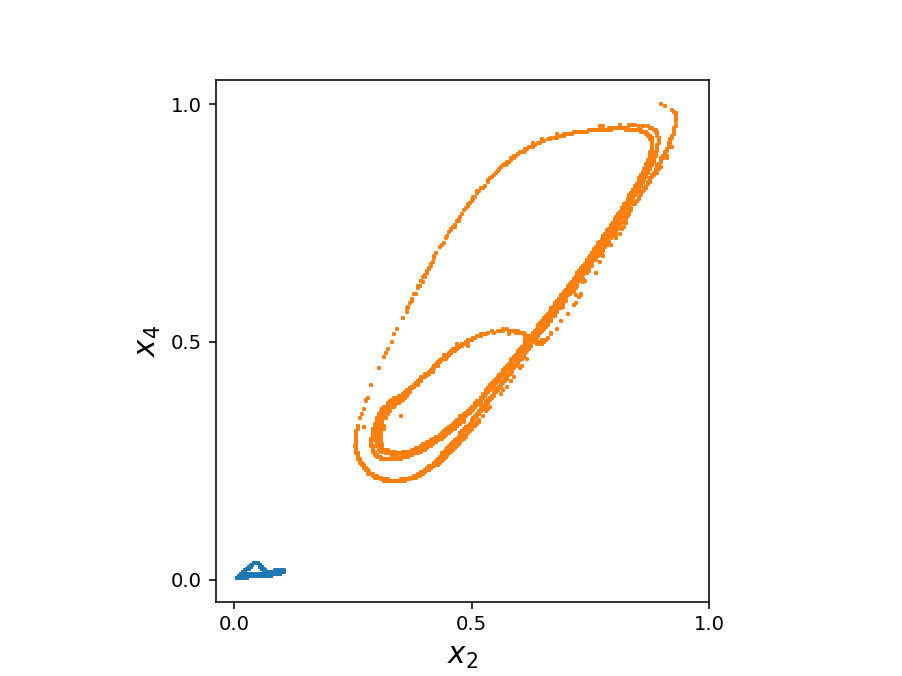

In [19]:
fig, ax = plt.subplots(dpi=141)
ax.set_aspect(1)
fig.canvas.draw()
s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
plt.scatter((N0arr[:,0]-delta), (N0arr[:,2]-delta), s=s, marker='s', label=i+1)
plt.scatter((N1arr[:,0]-delta), (N1arr[:,2]-delta), s=s, marker='s', label=i+1)
ax.set_xlabel('$x_2$', fontsize=15)
ax.set_ylabel('$x_4$', fontsize=15)
ax.set_xticks([0,nbins/2,nbins])
ax.set_yticks([0,nbins/2,nbins])
ax.set_xticklabels([0.,.5,1.])
ax.set_yticklabels([0.,.5,1.])
plt.savefig("Images/chaosbins_2d.png")
plt.show()

In [26]:
fN0 = set()#[]
for g in N0:
    for e in list(cds.G.out_edges(g)):
#         print(g,e[0],e[1])
#         fN0.append(e[1])
        fN0.add(e[1])
N00 = N0
N00=N00.intersection(fN0)
cds.G.subgraph(N00).nodes()

fN1 = set()#[]
for g in N1:
    for e in list(cds.G.out_edges(g)):
#         print(e[1])
#         fN0.append(e[1])
        fN1.add(e[1])
N11 = N1
N11=N11.intersection(fN1)

N01 = N0
N01=N01.intersection(fN1)

N10 = N1
N10=N10.intersection(fN0)

In [27]:
NforS01 = N00
NforS01 = NforS01.union(N01)
NforS01 = NforS01.union(N11)

NforS10 = N11
NforS10 = NforS01.union(N10)
NforS10 = NforS01.union(N00)


<IPython.core.display.Javascript object>


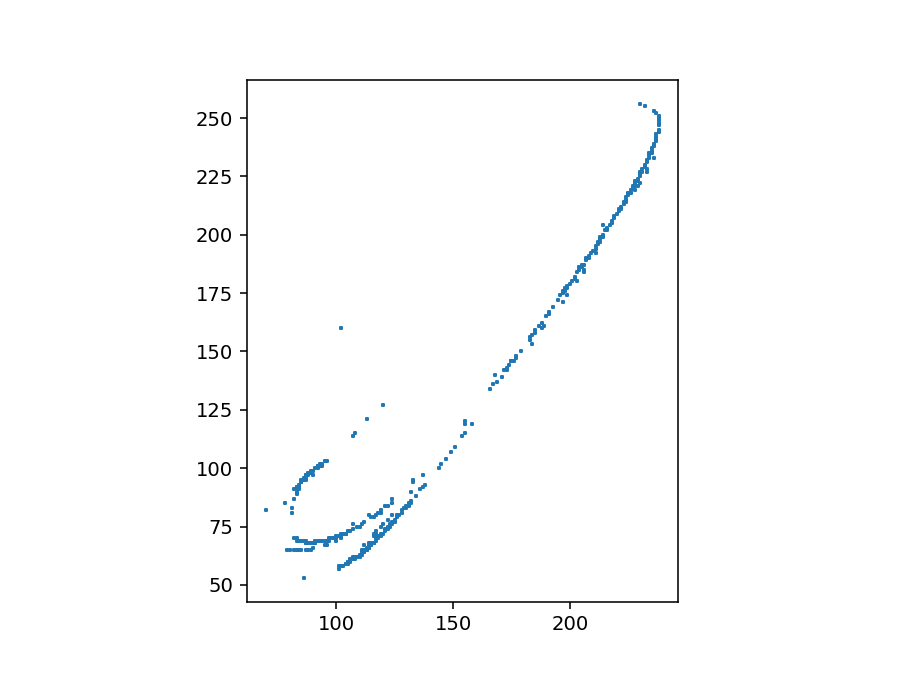

In [28]:
N00arr = np.array(list(N00))
N11arr = np.array(list(N11))
fig, ax = plt.subplots(dpi=141)
ax.set_aspect(1)
fig.canvas.draw()
s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
# plt.scatter((N00arr[:,0]-delta), (N00arr[:,1]-delta), s=s, marker='s', label=i+1)
plt.scatter((N11arr[:,0]-delta), (N11arr[:,2]-delta), s=s, marker='s', label=i+1)
# plt.legend()
plt.show()

In [29]:
# fig, ax = plt.subplots(dpi=141)
# ax.set_aspect(1)
# fig.canvas.draw()
# s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
# plt.scatter((N0arr[:,1]-delta), (N0arr[:,2]-delta), s=s, marker='s', label=i+1)
# plt.scatter((N1arr[:,1]-delta), (N1arr[:,2]-delta), s=s, marker='s', label=i+1)
# # plt.legend()
# plt.show()

In [30]:
Nbhd = list(N11)
S = cds.invariantPart(Nbhd)
S

{(89, 57, 99),
 (90, 57, 99),
 (110, 4, 62),
 (110, 4, 63),
 (136, 3, 91),
 (137, 3, 92),
 (138, 3, 93),
 (228, 3, 219),
 (230, 3, 222),
 (233, 3, 228),
 (236, 3, 233)}

In [33]:
#Get (isolated) neighbourhood (candidate) around recurrent set
Nbhd = list(N11)
print("Finding isolated nbhd")
S = cds.invariantPart(Nbhd)
M = cds.cubical_wrap(S).intersection(cds.G.nodes())

# for mstep in range(1):
#     M = cds.cubical_wrap(M).intersection(cds.G.nodes())

#calculate index pair
try:
    print("Calculating index pair")
    P1, P0, Pbar1, Pbar0 = cds.index_pair(M)

    #write index pairs to file for Conley index calcualtion with CHomP

    P1graph = nx.subgraph(cds.G, P1)
#     P1graph =cds.G
    cubefile, mapfile = cf.write_mapandcubes(P1graph, cds.delta, cds)
    with open('rc%s_P1_map.map'%(i+1), 'w') as f:
        f.writelines(mapfile)
    with open('rc%s_P1_cubes.cub'%(i+1), 'w') as f:
        f.writelines(cubefile)

    P0graph = nx.subgraph(cds.G, P0)
    cubefile, mapfile = cf.write_mapandcubes(P0graph, cds.delta, cds)
    with open('rc%s_P0_cubes.cub'%(i+1), 'w') as f:
        f.writelines(cubefile)

    print("Calculating homology")

#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_map.map'%(i+1)],stdout=subprocess.PIPE)
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_cubes.cub'%(i+1), 'rc%s_P0_cubes.cub'%(i+1)],stdout=subprocess.PIPE)
    proc = subprocess.Popen(['homcubes', '-i',
                             'rc%s_P1_map.map'%(i+1), 
                             'rc%s_P1_cubes.cub'%(i+1),
                             'rc%s_P0_cubes.cub'%(i+1)], stdout=subprocess.PIPE)

    linenum = 0
#         print(proc.stdout.readlines())
    while True:
        line = proc.stdout.readline()
        if not line:
            break
#             print("           "+line.rstrip().decode('UTF-8'))
        if line.rstrip().decode('UTF-8')[0] in ['H', '	', 'D', 'F'] and not line.rstrip().decode('UTF-8')[1] == 'O':
#             if line.rstrip().decode('UTF-8')[0:2] == 'H_' or line.rstrip().decode('UTF-8')[0:2] == '  ' or line.rstrip().decode('UTF-8')[0:2] == 'Di':

            print("           "+line.rstrip().decode('UTF-8'))
        linenum+=1

except Exception as e:
    if e=='too many values to unpack (expected 4)':
        print('Faile')
    else:
        print(e)

Finding isolated nbhd
Calculating index pair
Calculating homology
           Forgetting 66 cells from B.
           H_0 = Z^5
           H_1 = Z
           H_0 = Z^3
           H_1 = Z^2
           Dim 0:	f (x1) = 0
           	f (x2) = 0
           	f (x3) = 0
           	f (x4) = 0
           	f (x5) = y3
           Dim 1:	f (x1) = y2
           Dim 0:	i (x1) = y3
           	i (x2) = y3
           	i (x3) = y2
           	i (x4) = y1
           	i (x5) = 0
           Dim 1:	i (x1) = 0


In [75]:
mapfile

'(6, 2, 5) -> {}\n(6, 3, 4) -> {}\n(6, 2, 4) -> {}\n(6, 3, 5) -> {}\n(5, 2, 4) -> {}\n(5, 3, 6) -> {}\n(6, 4, 6) -> {}\n'

In [76]:
proc = subprocess.Popen(['homcubes', '-i',
                                 'rc%s_P1_map.map'%(i+1), 
#                                  'rc%s_P1_cubes.cub'%(i+1),
#                                  'rc%s_P0_cubes.cub'%(i+1)
                        ],
                                    stdout=subprocess.PIPE)

linenum = 0
while True:
    line = proc.stdout.readline()
    if not line:
        break
    print("           "+line.rstrip().decode('UTF-8'))
    linenum+=1

           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Reading the domain of the map from 'rc1_P1_map.map'... 9 cubes read.
           50000 bit fields allocated (0 MB) to speed up 3-dimensional reduction.
           Reducing full-dim cubes from X... .         0*         0 8 removed, 1 left.
           Note: The program assumes that the input map is acyclic.
           Reading the map on X from 'rc1_P1_map.map'... Done.
           Verifying if the image of X is contained in Y... Passed.
           Computing the image of the map... and of the inclusion... 4 cubes.
           Reducing full-dim cubes from Y... .         0* 5 removed, 4 left.
           Transforming X into cells... 1 cells added.
           Transforming Y into cells... 4 cells added.
           Collapsing faces in X... 3*.2*.1*. 26 removed, 1 left.
           

In [66]:
i=0
proc = subprocess.Popen(['homcubes', 'rc%s_P1_cubes.cub'%(i+1), 
                                    'rc%s_P0_cubes.cub'%(i+1)],
                                    stdout=subprocess.PIPE)

linenum = 0
while True:
    line = proc.stdout.readline()
    if not line:
        break
    print("           "+line.rstrip().decode('UTF-8'))
    linenum+=1

           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Note: The empty file 'rc1_P0_cubes.cub' is assumed to contain cubes.
           Reading cubes to X from 'rc1_P1_cubes.cub'... 21 cubes read.
           Reading cubes to A from 'rc1_P0_cubes.cub'... 0 cubes read.
           50000 bit fields allocated (0 MB) to speed up 3-dimensional reduction.
           Reducing full-dim cubes from X... .         0*         0 19 removed, 2 left.
           Transforming X into cells... 2 cells added.
           Collapsing faces in X... 3*.2*.1*. 52 removed, 2 left.
           Note: The dimension of X decreased from 3 to 0.
           Creating the chain complex of X... Done.
           Vertices used: 32 of dim 3.
           Time used so far: 0.00 sec (0.000 min).
           Computing the homology of X over the ring of integers...
           H_0 = Z^2